<a href="https://colab.research.google.com/github/meza1122/Project/blob/main/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading The Dataset**

In [1]:
import pandas as pd

data = pd.read_csv("/content/athlete_events.csv", engine='python', on_bad_lines='skip')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
import pandas as pd

data = pd.read_csv("/content/noc_regions.csv")
data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# **Cleaning Data**

In [3]:
import pandas as pd

athletes = pd.read_csv('/content/athlete_events.csv', engine='python', on_bad_lines='skip')
regions = pd.read_csv('/content/noc_regions.csv')

# **Cleaning Column Names**

In [4]:
athletes.columns = athletes.columns.str.strip().str.lower().str.replace(' ', '_')
regions.columns = regions.columns.str.strip().str.lower().str.replace(' ', '_')
print(athletes.columns)
print(regions.columns)

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')
Index(['noc', 'region', 'notes'], dtype='object')


# **Checking for Missing Data**

In [5]:
print(athletes.isnull().sum)

<bound method DataFrame.sum of            id   name    sex    age  height  weight   team    noc  games  \
0       False  False  False  False   False   False  False  False  False   
1       False  False  False  False   False   False  False  False  False   
2       False  False  False  False    True    True  False  False  False   
3       False  False  False  False    True    True  False  False  False   
4       False  False  False  False   False   False  False  False  False   
...       ...    ...    ...    ...     ...     ...    ...    ...    ...   
130438  False  False  False  False   False   False  False  False  False   
130439  False  False  False  False   False   False  False  False  False   
130440  False  False  False  False   False   False  False  False  False   
130441  False  False  False  False   False   False  False  False  False   
130442  False  False  False  False   False   False  False  False  False   

         year  season   city  sport  event  medal  
0       False   

In [6]:
print(regions.isnull().sum)

<bound method DataFrame.sum of        noc  region  notes
0    False   False   True
1    False   False  False
2    False   False   True
3    False   False   True
4    False   False   True
..     ...     ...    ...
225  False   False   True
226  False   False  False
227  False   False  False
228  False   False   True
229  False   False   True

[230 rows x 3 columns]>


In [7]:
athletes['height'] = athletes['height'].fillna(athletes['height'].median)
athletes['weight'] = athletes['weight'].fillna(athletes['weight'].median)

athletes['medal'] = athletes['medal'].fillna('No Medal')

# **Joining Dataset**

In [8]:
merged = pd.merge(athletes, regions, how= 'left', on='noc')
print(merged.head())

   id                      name sex   age  \
0   1                 A Dijiang   M  24.0   
1   2                  A Lamusi   M  23.0   
2   3       Gunnar Nielsen Aaby   M  24.0   
3   4      Edgar Lindenau Aabye   M  34.0   
4   5  Christine Jacoba Aaftink   F  21.0   

                                              height  \
0                                              180.0   
1                                              170.0   
2  <bound method Series.median of 0         180.0...   
3  <bound method Series.median of 0         180.0...   
4                                              185.0   

                                              weight            team  noc  \
0                                               80.0           China  CHN   
1                                               60.0           China  CHN   
2  <bound method Series.median of 0         80.0\...         Denmark  DEN   
3  <bound method Series.median of 0         80.0\...  Denmark/Sweden  DEN   
4      

# **Categorical Data**

In [9]:
categorical_cols = ['name', 'sex', 'team', 'sport', 'event', 'medal', 'region']
for col in categorical_cols:
  merged[col] = merged[col].astype('category')


In [10]:
print(merged.info())
print(merged.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      130443 non-null  int64   
 1   name    130443 non-null  category
 2   sex     130443 non-null  category
 3   age     125913 non-null  float64 
 4   height  130443 non-null  object  
 5   weight  130443 non-null  object  
 6   team    130443 non-null  category
 7   noc     130443 non-null  object  
 8   games   130443 non-null  object  
 9   year    130443 non-null  int64   
 10  season  130443 non-null  object  
 11  city    130443 non-null  object  
 12  sport   130443 non-null  category
 13  event   130443 non-null  category
 14  medal   130443 non-null  category
 15  region  130315 non-null  category
 16  notes   2375 non-null    object  
dtypes: category(7), float64(1), int64(2), object(7)
memory usage: 14.2+ MB
None
                   id                              name     sex  \


# **Full** **Block** **Code**

In [11]:
import pandas as pd

athletes = pd.read_csv('/content/athlete_events.csv', engine='python', on_bad_lines='skip')
regions = pd.read_csv('/content/noc_regions.csv')

athletes.columns = athletes.columns.str.strip().str.lower().str.replace(' ', '_')
regions.columns = regions.columns.str.strip().str.lower().str.replace(' ', '_')

athletes['height'] = athletes['height'].fillna(athletes['height'].median())
athletes['weight'] = athletes['weight'].fillna(athletes['weight'].median())

athletes['medal'] = athletes['medal'].fillna('No Medal')

merged = pd.merge(athletes, regions, how= 'left', on='noc')

merged = merged.drop_duplicates()

categorical_cols = ['name', 'sex', 'team', 'sport', 'event', 'medal', 'region']
for col in categorical_cols:
  merged[col] = merged[col].astype('category')

categorical_cols = ['name', 'sex', 'team', 'sport', 'event', 'medal', 'region']
for col in categorical_cols:
  merged[col] = merged[col].astype('category')

merged.info()
merged.head()


<class 'pandas.core.frame.DataFrame'>
Index: 136547 entries, 0 to 137297
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      136547 non-null  int64   
 1   name    136547 non-null  category
 2   sex     136547 non-null  category
 3   age     131814 non-null  float64 
 4   height  136547 non-null  float64 
 5   weight  136547 non-null  float64 
 6   team    136547 non-null  category
 7   noc     136547 non-null  object  
 8   games   136547 non-null  object  
 9   year    136547 non-null  int64   
 10  season  136547 non-null  object  
 11  city    136547 non-null  object  
 12  sport   136547 non-null  category
 13  event   136547 non-null  category
 14  medal   136547 non-null  category
 15  region  136409 non-null  category
 16  notes   2500 non-null    object  
dtypes: category(7), float64(3), int64(2), object(5)
memory usage: 15.8+ MB


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


# ***Research Question***

How was the particaption bewteen male and female athletes in the olmpics changed over the years.

draft

/tmp/ipython-input-15-1073392016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_count_by_year = merged.groupby(['year', 'sex'])['id'].nunique().reset_index()


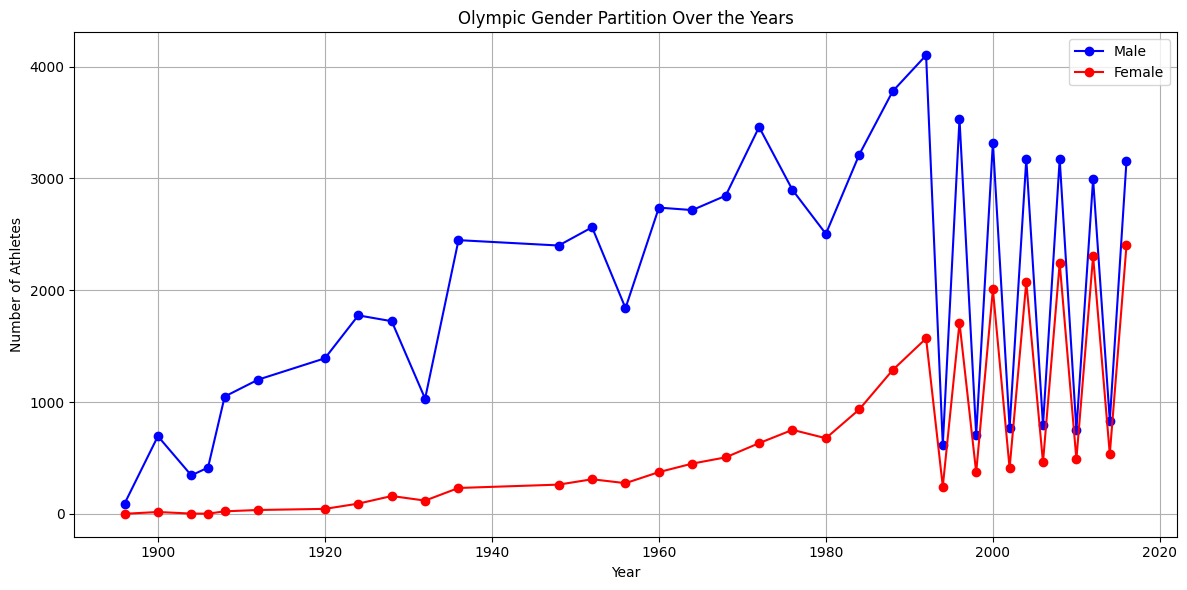

In [15]:
import matplotlib.pyplot as plt
gender_count_by_year = merged.groupby(['year', 'sex'])['id'].nunique().reset_index()
pivot_gender_count = gender_count_by_year.pivot(index='year', columns='sex', values='id')

plt.figure(figsize=(12, 6))
plt.plot(pivot_gender_count.index, pivot_gender_count['M'], label='Male', color='blue', marker='o')
plt.plot(pivot_gender_count.index, pivot_gender_count['F'], label='Female', color='red', marker='o')

plt.title('Olympic Gender Partition Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

full block

/tmp/ipython-input-18-3693095067.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_by_year = summer.groupby(['year', 'sex'])['id'].nunique().reset_index()


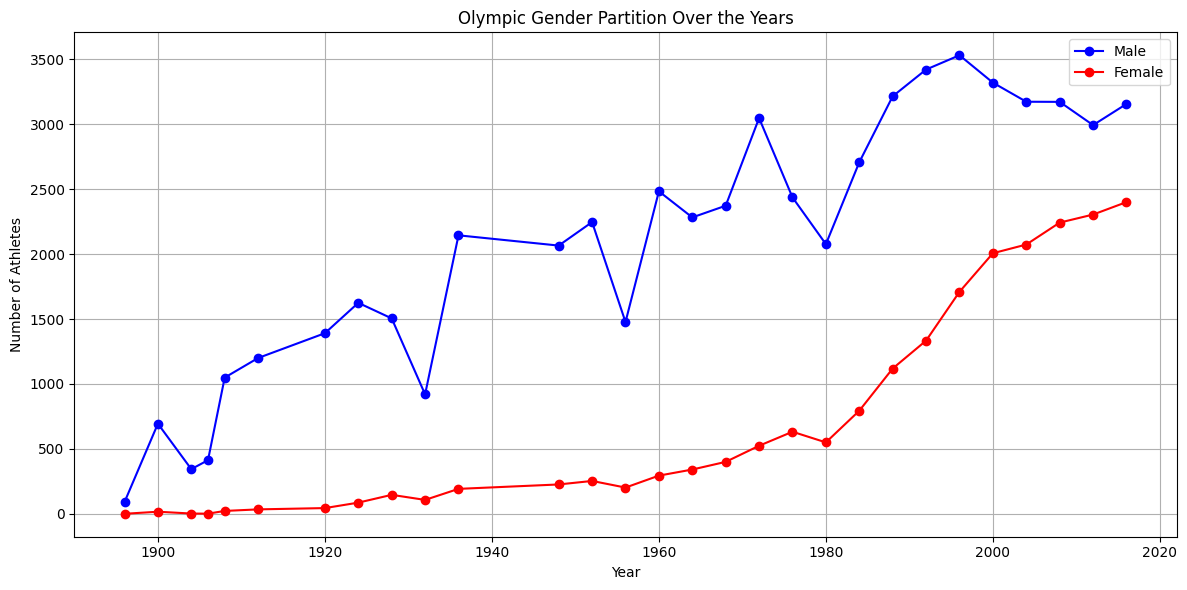

In [18]:
import matplotlib.pyplot as plt
summer= merged[merged['season'] == 'Summer']
gender_by_year = summer.groupby(['year', 'sex'])['id'].nunique().reset_index()
pivot_gender_count = gender_by_year.pivot(index='year', columns='sex', values='id')

plt.figure(figsize=(12, 6))
plt.plot(pivot_gender_count.index, pivot_gender_count['M'], label='Male', color='blue', marker='o')
plt.plot(pivot_gender_count.index, pivot_gender_count['F'], label='Female', color='red', marker='o')

plt.title('Olympic Gender Partition Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()